In [1]:
#pip install requests

In [2]:
#pip install simplejson

In [3]:
#pip install matplotlib

In [4]:
#pip install yfinance

In [5]:
#pip install sqlalchemy

In [6]:
#pip install pymysql

In [7]:
#pip install pandas_datareader

In [8]:
#pip install ta

In [9]:
import importlib
import subprocess
import sys

def install_dependencies(packages):
    """
    Installs only the missing packages or reinstalls them if they already exist.

    Args:
        packages (dict): A dictionary where the key is the package name 
                         and the value is the version (optional).
    """
    for package, version in packages.items():
        try:
            # Check if the package is already installed
            importlib.import_module(package)
            print(f"{package} is already installed. Uninstalling and reinstalling...")
            # Uninstall the package if it's already installed
            #subprocess.check_call([sys.executable, "-m", "pip", "uninstall", f"{package}", "-y"])
        except ImportError:
            print(f"{package} is not installed. Installing now...")

        # Install the package (after uninstalling if it existed)
        if version:
            subprocess.check_call([sys.executable, "-m", "pip", "install", f"{package}=={version}", "--upgrade", "--no-cache-dir"])
        else:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package, "--upgrade", "--no-cache-dir"])

# Define your dependencies (key: package name, value: version or None for latest)
dependencies = {
    "requests": None,
    #"numpy": "1.24.4",
    "yfinance": None,
    "simplejson": None,
    "matplotlib": None,
    "sqlalchemy": None,
    "pymysql": None,
    "pandas_datareader": None,
    "ta": None   
}

# Install the required dependencies
install_dependencies(dependencies)



requests is already installed. Uninstalling and reinstalling...
yfinance is already installed. Uninstalling and reinstalling...
simplejson is already installed. Uninstalling and reinstalling...
matplotlib is already installed. Uninstalling and reinstalling...
sqlalchemy is already installed. Uninstalling and reinstalling...
pymysql is already installed. Uninstalling and reinstalling...
pandas_datareader is already installed. Uninstalling and reinstalling...
ta is already installed. Uninstalling and reinstalling...


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
import json
from datetime import datetime,timedelta

In [12]:
import requests

In [13]:
import os
path = os.path.join('/home','jovyan','files', 'datasets')

In [14]:
from datetime import datetime

def convert_to_date(date_string, date_format="%Y-%m-%d"):
    """
    Converts a date string to a datetime object.
    
    Args:
        date_string (str): The date as a string.
        date_format (str): The format of the date string (default is '%Y-%m-%d').
    
    Returns:
        datetime: A datetime object representing the date, or None if conversion fails.
    """
    try:
        return datetime.strptime(date_string, date_format)
    except ValueError:
        print(f"Error: '{date_string}' does not match the format '{date_format}'")
        return None



In [15]:
import yfinance as yf



def fetch_daily_data(symbol, start_date, end_date):
    # Download historical data from Yahoo Finance
    ticker = yf.Ticker(symbol)  # Symbol is like 'BTC-USD', 'ETH-USD', etc.
    #path =f'/../datasets'
   
    # Fetch data for the specified date range
    data = ticker.history(start=start_date, end=end_date, interval="1d")
  
    if data.empty:
        print(f"No data available for {symbol} between {start_date} and {end_date}")
    else:
        # File name based on symbol and start date
        filename = f'Yahoo_Finance_{symbol}_{start_date.strftime("%Y_%m_%d")}.csv'

           
         # Convert 'Date' column to datetime if not already
        #data['NewDate'] = convert_to_date (data['Date'])

        # Process data
        data['vol_fiat'] = data['Volume'] * data['Close']  # Calculate fiat volume
        data['Provider'] = "Yahoo Finance"
        data['Asset'] = symbol
        
        # Save to CSV
        file_path = os.path.join(path, filename)
        data.to_csv(file_path, index=True)  # 'index=True' to include the date column
        print(f"Data saved to {filename}")



        

In [16]:
if __name__ == "__main__":
    pair = "BTC-USD"
    start = datetime.strptime("2015-01-01","%Y-%m-%d")
    today = pd.to_datetime('today').normalize()
    while(start <= today):
        end = start + timedelta(days=180)
        fetch_daily_data(symbol=pair,start_date=start,end_date=end)
        start = end + timedelta(days=1)

Data saved to Yahoo_Finance_BTC-USD_2015_01_01.csv
Data saved to Yahoo_Finance_BTC-USD_2015_07_01.csv
Data saved to Yahoo_Finance_BTC-USD_2015_12_29.csv
Data saved to Yahoo_Finance_BTC-USD_2016_06_27.csv
Data saved to Yahoo_Finance_BTC-USD_2016_12_25.csv
Data saved to Yahoo_Finance_BTC-USD_2017_06_24.csv
Data saved to Yahoo_Finance_BTC-USD_2017_12_22.csv
Data saved to Yahoo_Finance_BTC-USD_2018_06_21.csv
Data saved to Yahoo_Finance_BTC-USD_2018_12_19.csv
Data saved to Yahoo_Finance_BTC-USD_2019_06_18.csv
Data saved to Yahoo_Finance_BTC-USD_2019_12_16.csv
Data saved to Yahoo_Finance_BTC-USD_2020_06_14.csv
Data saved to Yahoo_Finance_BTC-USD_2020_12_12.csv
Data saved to Yahoo_Finance_BTC-USD_2021_06_11.csv
Data saved to Yahoo_Finance_BTC-USD_2021_12_09.csv
Data saved to Yahoo_Finance_BTC-USD_2022_06_08.csv
Data saved to Yahoo_Finance_BTC-USD_2022_12_06.csv
Data saved to Yahoo_Finance_BTC-USD_2023_06_05.csv
Data saved to Yahoo_Finance_BTC-USD_2023_12_03.csv
Data saved to Yahoo_Finance_BTC

In [17]:
import glob

combined_df = ""

csv_files = glob.glob(f"{path}/Yahoo_Finance_BTC-USD*.csv")

dataframes = []

for file in csv_files:
    df = pd.read_csv(file)
    dataframes.append(df)

combined_df = pd.concat(dataframes, ignore_index=True)

combined_df.drop_duplicates()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,vol_fiat,Provider,Asset
0,2015-01-01 00:00:00+00:00,320.434998,320.434998,314.002991,314.248993,8036550,0.0,0.0,2.525478e+09,Yahoo Finance,BTC-USD
1,2015-01-02 00:00:00+00:00,314.079010,315.838989,313.565002,315.032013,7860650,0.0,0.0,2.476356e+09,Yahoo Finance,BTC-USD
2,2015-01-03 00:00:00+00:00,314.846008,315.149994,281.082001,281.082001,33054400,0.0,0.0,9.290997e+09,Yahoo Finance,BTC-USD
3,2015-01-04 00:00:00+00:00,281.145996,287.230011,257.612000,264.195007,55629100,0.0,0.0,1.469693e+10,Yahoo Finance,BTC-USD
4,2015-01-05 00:00:00+00:00,265.084015,278.341003,265.084015,274.473999,43962800,0.0,0.0,1.206665e+10,Yahoo Finance,BTC-USD
...,...,...,...,...,...,...,...,...,...,...,...
3670,2025-02-07 00:00:00+00:00,96581.320312,100154.140625,95653.882812,96529.085938,55741290456,0.0,0.0,5.380656e+15,Yahoo Finance,BTC-USD
3671,2025-02-08 00:00:00+00:00,96533.257812,96877.804688,95702.492188,96482.453125,22447526395,0.0,0.0,2.165792e+15,Yahoo Finance,BTC-USD
3672,2025-02-09 00:00:00+00:00,96481.312500,97325.281250,94745.257812,96500.093750,27732901800,0.0,0.0,2.676228e+15,Yahoo Finance,BTC-USD
3673,2025-02-10 00:00:00+00:00,96499.460938,98333.218750,95320.843750,97437.554688,40078962391,0.0,0.0,3.905196e+15,Yahoo Finance,BTC-USD


In [18]:
from sqlalchemy import create_engine

engine = create_engine('mysql+pymysql://btc::O{Q\t0vVnUEZw/T]ggy@172.28.0.2:3306/bitcoin_db')

In [19]:
combined_df.to_sql('crypto', con=engine, if_exists='replace', index=False)

3675

In [20]:
#https://alternative.me/crypto/fear-and-greed-index/
import requests
import pandas as pd


url = 'https://api.alternative.me/fng/?limit=0'

response = requests.get(url)
response.raise_for_status()  
data = response.json()['data']
df = pd.DataFrame(data)
# Convert 'timestamp' to datetime and set timezone to UTC
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s', utc=True)
df.to_sql('FearGreedIndex', con=engine, if_exists='replace', index=False)

/tmp/ipykernel_3371/3393799420.py:13: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s', utc=True)


2564

In [21]:
query = """
SELECT `Date`, `Open`, High, Low, `Close`, Volume, cast(fgi.value AS UNSIGNED) as FGI
FROM bitcoin_db.crypto btc
LEFT JOIN bitcoin_db.FearGreedIndex fgi
ON btc.`Date` = fgi.`timestamp`
"""

data = pd.read_sql(query,con=engine).sort_values(by='Date')
data.head()

,Date,Open,High,Low,Close,Volume,FGI
0,2015-01-01 00:00:00+00:00,320.434998,320.434998,314.002991,314.248993,8036550,NaN
1,2015-01-02 00:00:00+00:00,314.079010,315.838989,313.565002,315.032013,7860650,NaN
2,2015-01-03 00:00:00+00:00,314.846008,315.149994,281.082001,281.082001,33054400,NaN
3,2015-01-04 00:00:00+00:00,281.145996,287.230011,257.612000,264.195007,55629100,NaN
4,2015-01-05 00:00:00+00:00,265.084015,278.341003,265.084015,274.473999,43962800,NaN


In [22]:
# Calculate the average of the FGI column, excluding NaN values
fg_average = data['FGI'].mean()

# Fill NaN values in the FGI column with the calculated average
data['FGI'].fillna(fg_average, inplace=True)

In [23]:
import ta

In [24]:
#https://www.investopedia.com/terms/m/macd.asp
#macd_object = ta.trend.MACD(data['close'])
macd_object = ta.trend.MACD(data['Close'], window_slow = 26, window_fast = 12, window_sign = 9, fillna= True)
data['MACD'] = macd_object.macd()
data['MACD_Signal'] = macd_object.macd_signal()
data['MACD_Diff'] = macd_object.macd_diff()
#data.tail()

In [25]:
#https://www.investopedia.com/terms/m/mfi.asp
mfi_indicator = ta.volume.MFIIndicator(high=data['High'], low=data['Low'], close=data['Close'], volume=data['Volume'], window=14)
data['mfi'] = mfi_indicator.money_flow_index()

In [26]:
# RSI
rsi = ta.momentum.rsi(data['Close'], window=14, fillna=True)
data['RSI'] = rsi

In [27]:
# EMA
ema_short = ta.trend.EMAIndicator(data['Close'], window=12, fillna=True)
ema_long = ta.trend.EMAIndicator(data['Close'], window=26, fillna=True)
data['EMA_Short'] = ema_short.ema_indicator()
data['EMA_Long'] = ema_long.ema_indicator()

In [28]:
# Bollinger Bands
bollinger = ta.volatility.BollingerBands(data['Close'], window=20, window_dev=2, fillna=True)
data['Bollinger_Upper'] = bollinger.bollinger_hband()
data['Bollinger_Lower'] = bollinger.bollinger_lband()
data['Bollinger_Middle'] = bollinger.bollinger_mavg()

In [29]:
# Stochastic Oscillator
stoch = ta.momentum.StochasticOscillator(data['High'], data['Low'], data['Close'], window=14, smooth_window=3, fillna=True)
data['Stochastic'] = stoch.stoch()
data['Stochastic_Signal'] = stoch.stoch_signal()

In [30]:
# ATR
atr = ta.volatility.AverageTrueRange(data['High'], data['Low'], data['Close'], window=14, fillna=True)
data['ATR'] = atr.average_true_range()

In [31]:
# Parabolic SAR
sar = ta.trend.PSARIndicator(data['High'], data['Low'], data['Close'], fillna=True)
data['SAR'] = sar.psar()

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prepare the data (assuming 'data' is already pre-processed with features)
data['Date'] = pd.to_datetime(data['Date'], utc=True)
data['Target'] = data['Close'].shift(-1)
data = data.dropna(subset=['Target'])

# Select features (excluding 'Date')
features = [
     'Bollinger_Upper', 'Bollinger_Lower', 'Bollinger_Middle','FGI', 'Close'
]

X = data[features]
y = data['Target']

In [40]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [41]:
# Standardize the features
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

In [42]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Make predictions for the next closing price
# Use the last row from X_test (or any new data)
latest_data = X_test.iloc[-1:]  # Keep it as a DataFrame (not numpy array)

# Apply the same scaling to the latest data
latest_data_scaled = scaler.transform(latest_data)  # The feature names are kept

# Make prediction for the next closing price
next_close_pred = model.predict(latest_data_scaled)
print(f"Predicted next closing price: {next_close_pred[0]}")

Mean Absolute Error: 964.1714893160862
Mean Squared Error: 2220464.3150030673
R-squared: 0.9960661746606368
Predicted next closing price: 96205.42994847443


In [43]:
# Extract the coefficients and the intercept
coefficients = model.coef_
intercept = model.intercept_

# Create a dictionary mapping feature names to their corresponding coefficients
feature_names = X.columns
equation = f"Predicted next closing price = {intercept:.2f}"

# Add each feature and its coefficient to the equation
for feature, coef in zip(feature_names, coefficients):
    equation += f" + ({coef:.2f}) * {feature}"

# Display the equation
print("Final equation for predicting the next closing price:")
print(equation)


Final equation for predicting the next closing price:
Predicted next closing price = 13401.05 + (119425533452440.25) * Bollinger_Upper + (92942848316450.31) * Bollinger_Lower + (-211589234733444.22) * Bollinger_Middle + (41.03) * FGI + (23.80) * SAR + (16086.92) * Close


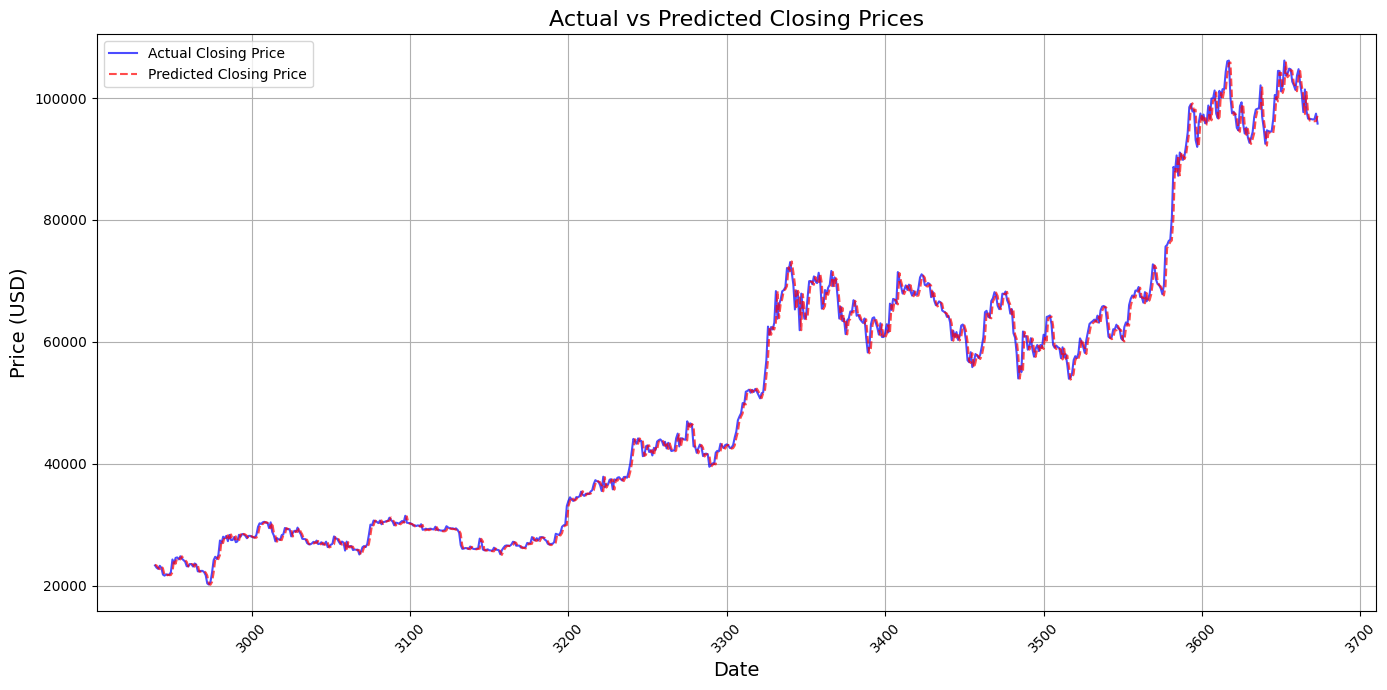

In [37]:
import matplotlib.pyplot as plt

# Create a DataFrame to store the actual vs predicted values
results = pd.DataFrame({
    'Date': X_test.index,
    'Actual': y_test,
    'Predicted': y_pred
})

# Plotting the actual vs predicted closing prices
plt.figure(figsize=(14, 7))
plt.plot(results['Date'], results['Actual'], label='Actual Closing Price', color='blue', alpha=0.7)
plt.plot(results['Date'], results['Predicted'], label='Predicted Closing Price', color='red', linestyle='--', alpha=0.7)

# Add titles and labels
plt.title('Actual vs Predicted Closing Prices', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend()
plt.grid(True)

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


In [44]:
import statsmodels.api as sm

# Store original column names
original_columns = X_train.columns

# Standardize the features (X_train_scaled) for fitting the model
X_with_intercept = sm.add_constant(X_train_scaled)  # Add intercept term to the features
y_train_array = y_train.values  # Convert to numpy array for Statsmodels compatibility

# Fit the model using Statsmodels
model_sm = sm.OLS(y_train_array, X_with_intercept)  # Ordinary Least Squares Regression
results = model_sm.fit()  # Fit the model

# Display the summary, which includes the p-values for each feature
summary = results.summary()

# Map p-values to the original feature names
p_values = results.pvalues[1:]  # Exclude the intercept (constant)
features_with_p_values = dict(zip(original_columns, p_values))

# Print the p-values for each feature and check significance
print("Feature p-values (human-readable labels):")
for feature, p_value in features_with_p_values.items():
    significance = "Significant" if p_value < 0.05 else "Not Significant"
    print(f"{feature}: {p_value:.4f} ({significance})")

# Optionally, print the full summary
print("\nFull summary with p-values:")
print(summary)




Feature p-values (human-readable labels):
Bollinger_Upper: 0.0094 (Significant)
Bollinger_Lower: 0.0136 (Significant)
Bollinger_Middle: 0.4151 (Not Significant)
FGI: 0.0217 (Significant)
SAR: 0.8596 (Not Significant)
Close: 0.0000 (Significant)

Full summary with p-values:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.368e+05
Date:                Tue, 11 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:59:32   Log-Likelihood:                -23833.
No. Observations:                2938   AIC:                         4.768e+04
Df Residuals:                    2932   BIC:                         4.771e+04
Df Model:                           5                                         
Covariance Type